**Firstly, downolading the dataset**


In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-09-16 17:12:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   116MB/s    in 0.6s    

2024-09-16 17:12:50 (116 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
dir='/tmp/cats_and_dogs_filtered'
# Directory of the training and validation data
train_dir=os.path.join(dir,'train')
validation_dir=os.path.join(dir,'validation')

# Directory of training and validation cats pics
train_dir_cats= os.path.join(train_dir,'cats')
validation_dir_cats= os.path.join(validation_dir,'cats')

# Directory of training and validation dogs pics
train_dir_dogs= os.path.join(train_dir,'dogs')
validation_dir_dogs= os.path.join(validation_dir,'dogs')



In [4]:
train_cat_fnames= os.listdir(train_dir_cats)
print(train_cat_fnames[:10])

train_dog_fnames= os.listdir(train_dir_dogs)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.658.jpg', 'cat.868.jpg', 'cat.552.jpg', 'cat.871.jpg', 'cat.453.jpg', 'cat.170.jpg', 'cat.733.jpg', 'cat.68.jpg', 'cat.110.jpg', 'cat.145.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
print( 'total training cat images :', len(train_cat_fnames))
print('total validation cat images :', len(os.listdir(validation_dir_cats)))
print('total training dog images :', len(train_dog_fnames))
print('total validation dog images :', len(os.listdir(validation_dir_dogs)))

total training cat images : 1000
total validation cat images : 500
total training dog images : 1000
total validation dog images : 500


Displaying images of the dataset


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mp
index=0

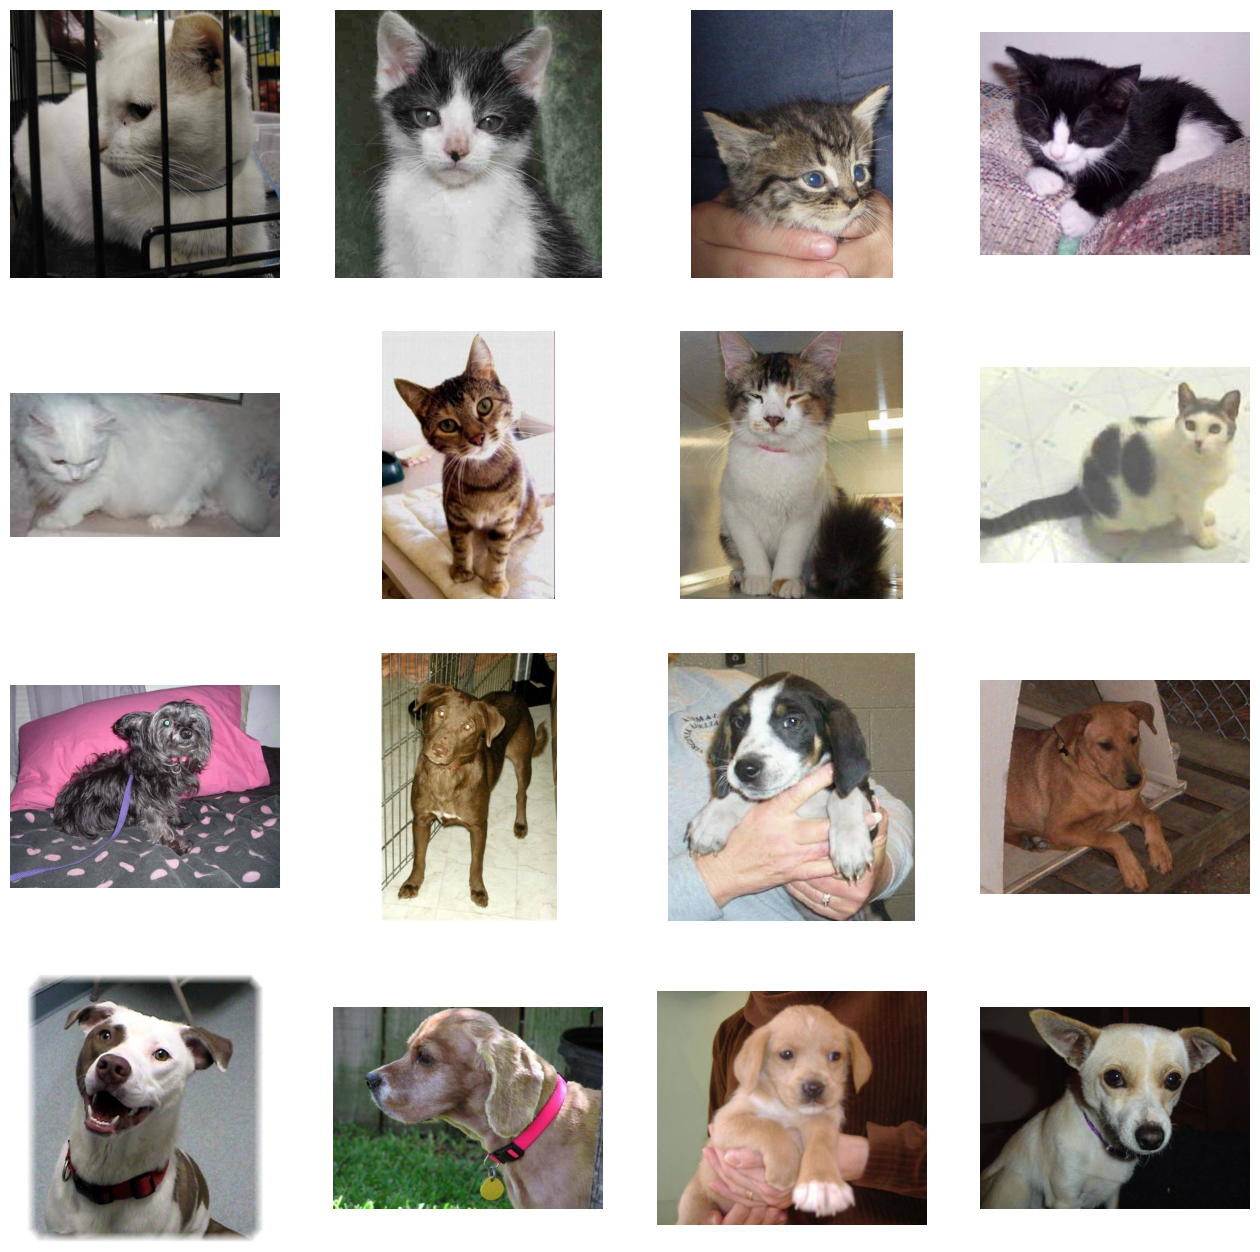

In [7]:
fig=plt.gcf()
fig.set_size_inches(16,16)

index += 8 # index is incremented every batch so that dirst batch is from 0-7 , second 8-15 and so on

next_cat_pic_index=[os.path.join(train_dir_cats, fname) for fname in train_cat_fnames[index-8:index]]
next_dog_pic_index = [os.path.join(train_dir_dogs, fname) for fname in train_dog_fnames[index-8:index]]


for i, image_path in enumerate(next_cat_pic_index +next_dog_pic_index ):
  sp=plt.subplot(4,4,i+1)
  sp.axis('off')
  img= mp.imread(image_path)
  plt.imshow(img)


plt.show()


**Preprocessing**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255)
validation_datagen= ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator= validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **Building a CNN model from scratch**





**Building the architecture of the layers**


In [9]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
from keras import models
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization

In [10]:
Img_input= layers.Input(shape=(150,150,3)) # Input feature map is 150x150 and 3 channels R G B
x= Conv2D(16,3, activation='relu')(Img_input) # 1st convolution layer extracts 16 features that's 3x3
X= MaxPooling2D(2)(x) # Followed by a maxpooling layer that's 2x2

x= Conv2D(32,3, activation='relu')(X) # 2nd convolution layer extracts 32 features that's 3x3
X= MaxPooling2D(2)(x) # Followed by a maxpooling layer that's 2x2

x= Conv2D(64,3, activation='relu')(X) # 3rd convolution layer extracts 64 features that's 3x3
X= MaxPooling2D(2)(x) # Followed by a maxpooling layer that's 2x2





In [11]:
x= Flatten()(X) # Flatten the 3D output to 1D
# Building the F/F NN with 512 hidden units
x= Dense(512, activation='relu')(x)

# Creating the output layer with a sigmoid function as it's a binary classification problem
Output_layer= Dense(1, activation='sigmoid')(x)

# Sticking the model together
model=models.Model(Img_input, Output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile( loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

**Training the model**


In [13]:
model.fit(train_generator,
          batch_size=20,
          epochs=15,
          validation_data=validation_generator,
          verbose=2)



Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 12s - 122ms/step - acc: 0.5200 - loss: 0.7194 - val_acc: 0.6460 - val_loss: 0.6802
Epoch 2/15
100/100 - 6s - 63ms/step - acc: 0.5950 - loss: 0.6727 - val_acc: 0.6020 - val_loss: 0.6626
Epoch 3/15
100/100 - 4s - 44ms/step - acc: 0.6570 - loss: 0.6261 - val_acc: 0.6860 - val_loss: 0.5979
Epoch 4/15
100/100 - 7s - 65ms/step - acc: 0.7245 - loss: 0.5550 - val_acc: 0.6990 - val_loss: 0.5777
Epoch 5/15
100/100 - 9s - 93ms/step - acc: 0.7540 - loss: 0.5044 - val_acc: 0.7180 - val_loss: 0.5521
Epoch 6/15
100/100 - 5s - 46ms/step - acc: 0.7840 - loss: 0.4615 - val_acc: 0.7290 - val_loss: 0.5684
Epoch 7/15
100/100 - 5s - 50ms/step - acc: 0.8195 - loss: 0.3947 - val_acc: 0.7160 - val_loss: 0.5647
Epoch 8/15
100/100 - 7s - 69ms/step - acc: 0.8665 - loss: 0.3128 - val_acc: 0.7190 - val_loss: 0.6453
Epoch 9/15
100/100 - 4s - 45ms/step - acc: 0.8985 - loss: 0.2484 - val_acc: 0.7300 - val_loss: 0.6096
Epoch 10/15
100/100 - 7s - 71ms/step - acc: 0.9355 - loss: 0.1584 - val_acc: 0.7470 - val_l

# **Building VGG model from scratch**

In [14]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [15]:
augmented_data= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    channel_shift_range=10.,
    fill_mode="nearest"

)
train_batches= augmented_data.flow_from_directory(directory=train_dir, target_size=(224,224), classes=['cats','dogs'], batch_size=32)
validation_batches=augmented_data.flow_from_directory(directory=validation_dir, target_size=(224,224), classes=['cats','dogs'], batch_size=32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model= Sequential()

model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 133,678,658 (509.94 MB)

 Trainable params: 133,678,658 (509.94 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the best model based on validation accuracy
checkpoint= ModelCheckpoint(
    "vgg16_1.keras", # Filepath to save the model
    monitor='val_accuracy', # Monitor the validation accuracy
    verbose=1, # 1--> print logs
    save_best_only=True, # Save only best model
    save_weights_only=False, # Save full model
    mode='auto', # Automatically choose the right mode min or max
    save_freq="epoch", # Save model after every epoch

)


In [18]:
# Stop training early if validation accuracy doesn't improve
early= EarlyStopping(
    monitor='val_accuracy', # Monitor validation accuracy
    min_delta=0, # Minimum change to qualify as an improvement
    patience=20, # Number of epochs to wait for improvement
    verbose=1,
    mode='auto'
)

In [19]:
history= model.fit(
    train_batches,
    validation_data=validation_batches,
    epochs=30,
    callbacks=[checkpoint, early]
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.4957 - loss: 0.8078
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to vgg16_1.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.4957 - loss: 0.8065 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.5029 - loss: 0.6932
Epoch 2: val_accuracy did not improve from 0.50000
63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 740ms/step - accuracy: 0.5028 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.4878 - loss: 0.6932
Epoch 3: val_accuracy did not improve from 0.50000
63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 847ms/step - accuracy: 0.4879 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.4845 - loss: 0.6932
Epoch 4: val_accuracy did not improve from 0.50000
63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 730ms/step - accuracy: 0.4842 - loss: 0.6932 - 

# **using transfer learning**
**VGG16 model**



In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Loading the VGG16 model with its pre-trained weights to get a higher accuracy
def vgg16_pretrained( input_shape=(224,224,3)):
    base_model= VGG16(weights='imagenet', include_top=False, input_shape= input_shape)

    # Freeze base model layers
    for layers in base_model.layers:
        layers.trainable= False

    image_input= Input(shape=(224,224,3))
    x= base_model(image_input)
    x=Flatten()(x)
    x=Dense(4096, activation='relu')(x)
    x=Dense(4096, activation='relu')(x)
    x=Dense(2, activation='softmax')(x)

    model= Model(image_input, x, name='vgg16_new_trained')
    return model



In [21]:
# Compile the model
model_pretrained= vgg16_pretrained()
model_pretrained.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_pretrained.fit(
    train_batches,
    validation_data=validation_batches,
    epochs=50,  # Set a larger number of epochs
    callbacks=[checkpoint, early]  # Pass the callbacks here
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.6016 - loss: 9.4232
Epoch 1: val_accuracy improved from 0.50000 to 0.82000, saving model to vgg16_1.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6031 - loss: 9.3306 - val_accuracy: 0.8200 - val_loss: 0.3948
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8328 - loss: 0.3638
Epoch 2: val_accuracy improved from 0.82000 to 0.87600, saving model to vgg16_1.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8330 - loss: 0.3634 - val_accuracy: 0.8760 - val_loss: 0.2885
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.8646 - loss: 0.3171
Epoch 3: val_accuracy did not improve from 0.87600
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 605ms/step - accuracy: 0.8644 - loss: 0.3174 - val_accuracy: 0.8670 - val_loss: 0.2917
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.8877 - loss: 0.2708
Epoch 4: val_accuracy did not imp

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
cat


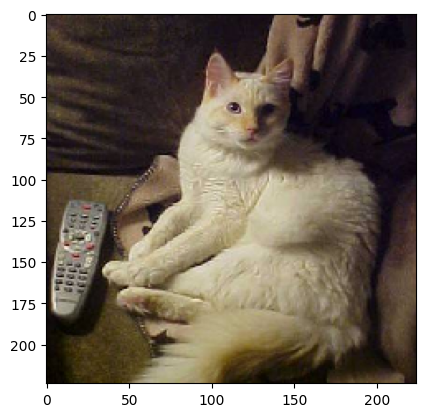

In [37]:
import random
# You can change the picture and the directory as you want
rand= str(random.randint(0, 999))
fname_dog = 'dog.'+rand+'.jpg'
fname_cat = 'cat.'+rand+'.jpg'

pic_path_dog = os.path.join(train_dir_dogs, fname_dog)
pic_path_cat = os.path.join(train_dir_cats, fname_cat)

import random
var = random.choice([pic_path_dog, pic_path_cat])

import matplotlib.pyplot as plt
from keras.utils import load_img
img = load_img(var,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = model_pretrained.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
  print("dog")

# **Visualization**



> **training and validation accuracy**



In [42]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy without sample points
def plot_training_history(history):
    # Get training and validation accuracy from the history object
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Get number of epochs
    epochs = range(1, len(accuracy) + 1)

    # Create the plot
    plt.figure(figsize=(8, 6))

    # Plot training accuracy (purple line)
    plt.plot(epochs, accuracy, '-', color='blue', label='Training Accuracy', linewidth=2)

    # Plot validation accuracy (yellow line)
    plt.plot(epochs, val_accuracy, '-', color='purple', label='Validation Accuracy', linewidth=2)

    # Set plot labels and title
    plt.title('Training and Validation Accuracy Over Epochs', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()

    # Show plot
    plt.show()




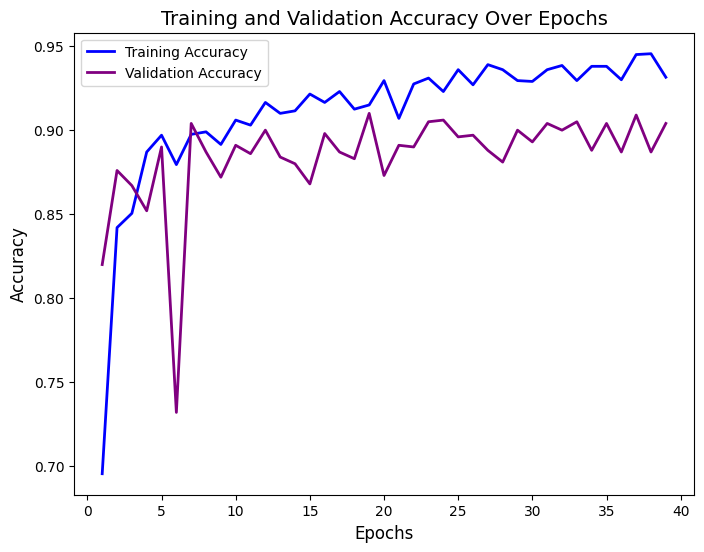

In [43]:
# Call the function to visualize accuracy
plot_training_history(history)



> **Plot Loss**



In [44]:
def plot_loss_history(history):
    # Get training and validation loss from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(1, len(loss) + 1)

    # Create the plot
    plt.figure(figsize=(8, 6))

    # Plot training loss
    plt.plot(epochs, loss,color='blue', label='Training Loss')

    # Plot validation loss
    plt.plot(epochs, val_loss,color='purple', label='Validation Loss')

    # Set plot labels and title
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show plot
    plt.show()




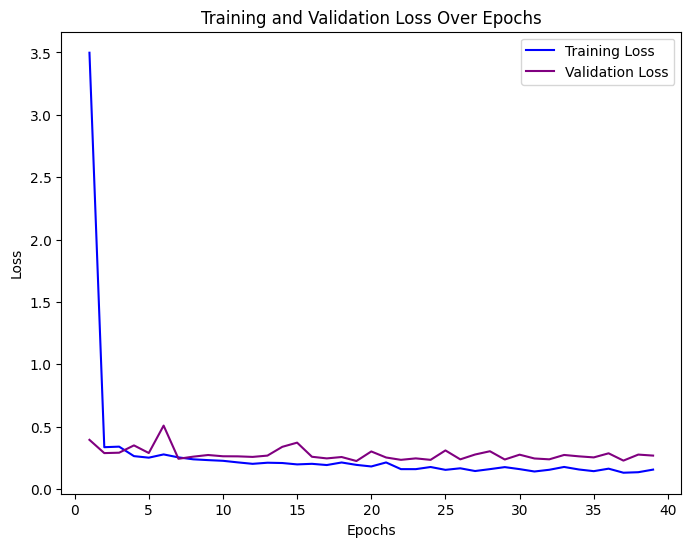

In [45]:
# Call the function to visualize loss
plot_loss_history(history)